# MOVIELENS RECOMMENDATION SYSTEMS


### Collaborators
- 1.Ruth Kitasi
- 2.Agatha Nyambati
- 3.Joseline Apiyo
- 4.Cecilia Ngunjiri
- 5.John Mbego
- 6.Leonard Koyio

![Movie.jpeg](Movie.jpeg)

# 1.BUSINESS UNDERSTANDING

## 1.1 Overview

In today's world of massive data growth, recommendation systems have become essential tools for filtering information and enhancing user experiences. These systems help users find relevant content by analyzing their past behaviors, such as search queries or browsing histories.

Companies like YouTube and Spotify use recommendation algorithms to suggest the next video or curate personalized playlists based on user preferences.

In line with our project objective we aim to harness the power of data analysis to build a movie recommendation system that provides users with personalized movie suggestions.

By analyzing user ratings of other movies, we can generate tailored recommendations that align with individual preferences. The goal is to develop a model that delivers the top 5 movie recommendations for each user, optimizing their viewing experience based on their previous interactions.

## 1.2 Problem statement

With the vast amount of content available on streaming platforms, users often feel overwhelmed by choices, making it difficult to discover movies that align with their preferences. Traditional search methods fall short in addressing this challenge, resulting in a less satisfying user experience and decreased engagement.

MovieLens has tasked our team of data scientists with optimizing their recommendation system through data-driven approaches. By analyzing user behaviors and preferences, we aim to enhance the system's ability to deliver personalized movie recommendations.

## 1.3 Objectives

1. Develop a Personalized Recommendation System: Build a model that provides the top 5 movie recommendations to a user based on their ratings of other movies.

2. Implement Content-Based Filtering for Existing Users: Establish a content-based filtering mechanism for existing users, enabling them to input specific movie titles to receive similar movie suggestions.

3. Mitigate the Cold Start Problem by:

   - Promoting Movie Popularity: Recommend high-rated movies to new users lacking interaction history, regardless of genre.
   - Content-Based Filtering: Allow new users to select their preferred movie genre and receive the best movies within that genre.

4. Evaluate the Recommendation System Performance: Assess the effectiveness of the recommendation system using the Root Mean Square Error (RMSE) metric.

5. Analyze Movie Rating Frequency: Conduct an analysis of the MovieLens dataset to determine the average movie rating, aiming to understand user preferences.



## 1.4 Data Limitations.

While the MovieLens dataset is valuable for building a movie recommender system, it has some limitations:

* Limited Temporal Coverage: The dataset spans a specific time period, which may not capture the most recent trends or preferences.

* Cold-Start Problem: The system may struggle to provide recommendations for new users or movies with limited ratings or tags.

* Bias in Ratings: User ratings can be influenced by various factors, such as popularity bias or groupthink, which may affect the accuracy of recommendations.

# 2. DATA UNDERSTANDING

## 2.1 Data Source

The dataset https://grouplens.org/datasets/movielens/, was obtained from the GroupLens website which  is a well-known resource for research in recommendation systems and data analysis.

The Movielens comprises of four files:

##### 1. `links.csv`
Contains identifiers linking MovieLens movies to external databases (IMDB and TMDb). The structure is:



| Column    | Description                                            |
|-----------|--------------------------------------------------------|
| `movieId` | ID representing each movie in the MovieLens dataset    |
| `imdbId`  | Corresponding movie ID from IMDb                       |
| `tmdbId`  | Corresponding movie ID from The Movie Database (TMDb)  |



##### 2. `movies.csv`
This file includes movie titles and their associated genres. The data is structured as follows:

| Column    | Description                                            |
|-----------|--------------------------------------------------------|
| `movieId` | ID representing each movie                             |
| `title`   | Movie title, including the year of release (e.g., *Toy Story (1995)*) |
| `genres`  | Pipe-separated list of genres (e.g., *Animation|Children's|Comedy*)   |



##### 3. `ratings.csv`
This file contains explicit user ratings for movies on a **5-star scale**. The data is structured as:

| Column   | Description                                   |
|----------|-----------------------------------------------|
| `userId` | Anonymized ID representing each user          |
| `movieId`| ID representing each movie                    |
| `rating` | User rating for the movie (0.5 to 5.0 stars)  |
| `timestamp` | UNIX timestamp when the rating was made     |

Ratings are sorted first by `userId`, then by `movieId`.

##### 4. `tags.csv`
Tags represent user-generated metadata (e.g., short descriptions or labels). The structure is:

| Column   | Description                                    |
|----------|------------------------------------------------|
| `userId` | Anonymized ID representing each user           |
| `movieId`| ID representing each movie                     |
| `tag`    | User-assigned tag for the movie                |
| `timestamp` | UNIX timestamp when the tag was added       |

Like ratings, tags are sorted by `userId` and then by `movieId`


  

## 2.2 Data loading and Inspection


In [213]:
## Importing the libraries

import pandas as pd
import numpy as np


In [214]:
#Creating a function to read the files.

def read_csv_file(file_name):

    try:
        df = pd.read_csv(file_name)
        print(f"{file_name} read successfully!")
        return df
    except FileNotFoundError:
        print(f"Error: {file_name} not found!")
    except Exception as e:
        print(f"An error occurred while reading {file_name}: {e}")


In [215]:
#using the fucntion to read files.

links = read_csv_file("ml-latest-small\links.csv")
movies = read_csv_file("ml-latest-small\movies.csv")
ratings = read_csv_file(r"ml-latest-small\ratings.csv")
tags = read_csv_file("ml-latest-small/tags.csv")

ml-latest-small\links.csv read successfully!
ml-latest-small\movies.csv read successfully!
ml-latest-small\ratings.csv read successfully!
ml-latest-small/tags.csv read successfully!


In [216]:
# checking for basic statistics of our data sets

def basic_stats(dataset, dataset_name):
    print('dataset: ',dataset_name )
    print('\n')
    dataset.info()
    print('-------------------')
    print('\n')
    print(dataset.describe())
    print('-------------------')
    print('\n')
    print('shape: ',dataset.shape)

In [217]:
# links dataset summary

basic_stats(links, 'Links file')

dataset:  Links file


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   movieId  9742 non-null   int64  
 1   imdbId   9742 non-null   int64  
 2   tmdbId   9734 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 228.5 KB
-------------------


             movieId        imdbId         tmdbId
count    9742.000000  9.742000e+03    9734.000000
mean    42200.353623  6.771839e+05   55162.123793
std     52160.494854  1.107228e+06   93653.481487
min         1.000000  4.170000e+02       2.000000
25%      3248.250000  9.518075e+04    9665.500000
50%      7300.000000  1.672605e+05   16529.000000
75%     76232.000000  8.055685e+05   44205.750000
max    193609.000000  8.391976e+06  525662.000000
-------------------


shape:  (9742, 3)


In [218]:
# movies dataset summary

basic_stats(movies, 'Movies file stats summary report')

dataset:  Movies file stats summary report


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB
-------------------


             movieId
count    9742.000000
mean    42200.353623
std     52160.494854
min         1.000000
25%      3248.250000
50%      7300.000000
75%     76232.000000
max    193609.000000
-------------------


shape:  (9742, 3)


In [219]:
# Rating dataset summary

basic_stats(ratings, 'Rating file stats summary report')

dataset:  Rating file stats summary report


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB
-------------------


              userId        movieId         rating     timestamp
count  100836.000000  100836.000000  100836.000000  1.008360e+05
mean      326.127564   19435.295718       3.501557  1.205946e+09
std       182.618491   35530.987199       1.042529  2.162610e+08
min         1.000000       1.000000       0.500000  8.281246e+08
25%       177.000000    1199.000000       3.000000  1.019124e+09
50%       325.000000    2991.000000       3.500000  1.186087e+09
75%       477.000000    8122.000000       4.000000  1.435994e+09
max    

In [220]:
# movies dataset summary

basic_stats(tags, 'Tags file stats summary report')

dataset:  Tags file stats summary report


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3683 entries, 0 to 3682
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   userId     3683 non-null   int64 
 1   movieId    3683 non-null   int64 
 2   tag        3683 non-null   object
 3   timestamp  3683 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 115.2+ KB
-------------------




            userId        movieId     timestamp
count  3683.000000    3683.000000  3.683000e+03
mean    431.149335   27252.013576  1.320032e+09
std     158.472553   43490.558803  1.721025e+08
min       2.000000       1.000000  1.137179e+09
25%     424.000000    1262.500000  1.137521e+09
50%     474.000000    4454.000000  1.269833e+09
75%     477.000000   39263.000000  1.498457e+09
max     610.000000  193565.000000  1.537099e+09
-------------------


shape:  (3683, 4)


#### Observations made from data undertanding

- All the four files have a common feature which is the movieID column.

- The links and the movie datasets have equal number of rows of 9742.

- Each dataset presents a mixed type of data.(int64, object and float64)

## 2.3 Merging Files

Given that the four datasets share a common feature, the movie ID, we will use this column to perform a merge, consolidating the datasets into a single file. This approach ensures not only the integration of information from different sources but also enhances data completeness and facilitates more thorough analysis.

In [221]:
## Merging files on the common feature the MovieID

##Step 1: Merging the movies and the links datasets.
movies_links_merged =  pd.merge(movies, links, on='movieId', how='inner')
movies_links_merged.head()

,movieId,title,genres,imdbId,tmdbId
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0
1,2,Jumanji (1995),Adventure|Children|Fantasy,113497,8844.0
2,3,Grumpier Old Men (1995),Comedy|Romance,113228,15602.0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,114885,31357.0
4,5,Father of the Bride Part II (1995),Comedy,113041,11862.0


In [222]:
##Step 2: Merging the movies_links_merged and ratings datasets on movieId

movies_links_ratings_merged =pd.merge(ratings, movies_links_merged,on='movieId', how='inner')
movies_links_ratings_merged.head()

,userId,movieId,rating,timestamp,title,genres,imdbId,tmdbId
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0
1,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0
2,7,1,4.5,1106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0
3,15,1,2.5,1510577970,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0
4,17,1,4.5,1305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0


In [223]:
##Step 3: Merging the results of movies_links_rating_merged with the tags dataset.
final_merge =  pd.merge(movies_links_ratings_merged, tags, on=['movieId','userId'])
final_merge.head()

,userId,movieId,rating,timestamp_x,title,genres,imdbId,tmdbId,tag,timestamp_y
0,336,1,4.0,1122227329,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0,pixar,1139045764
1,474,1,4.0,978575760,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0,pixar,1137206825
2,567,1,3.5,1525286001,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0,fun,1525286013
3,289,3,2.5,1143424657,Grumpier Old Men (1995),Comedy|Romance,113228,15602.0,moldy,1143424860
4,289,3,2.5,1143424657,Grumpier Old Men (1995),Comedy|Romance,113228,15602.0,old,1143424860


In [224]:
## Checking the number of rows and colums of our final merged dataset

rows, colums = final_merge.shape
print(f'The final merged dataset contains {rows} rows and {colums} colums')

The final merged dataset contains 3476 rows and 10 colums


In [225]:
##Getting the conside summary of the final merged dataset

final_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3476 entries, 0 to 3475
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   userId       3476 non-null   int64  
 1   movieId      3476 non-null   int64  
 2   rating       3476 non-null   float64
 3   timestamp_x  3476 non-null   int64  
 4   title        3476 non-null   object 
 5   genres       3476 non-null   object 
 6   imdbId       3476 non-null   int64  
 7   tmdbId       3476 non-null   float64
 8   tag          3476 non-null   object 
 9   timestamp_y  3476 non-null   int64  
dtypes: float64(2), int64(5), object(3)
memory usage: 298.7+ KB


The output shows that the final_merged dataset contains 3 types as follows:
- 2 float64
- 6 int664
- 3 Object

The memory usage of the final merged dataset is approximately 21.4 MB. This suggests that the dataset has grown significantly after merging, especially due to the repetition of movie information across different user ratings and tag.

High Movie Engagement: The fact that the merged dataset contains 233,213 rows while the ratings dataset had 100,836 rows suggests that multiple users have rated, tagged, or interacted with the same movie, indicating high engagement for some movies.


In [226]:
final_merge.describe()

,userId,movieId,rating,timestamp_x,imdbId,tmdbId,timestamp_y
count,3476.000000,3476.000000,3476.000000,3.476000e+03,3.476000e+03,3476.000000,3.476000e+03
mean,429.785386,28009.502301,4.016830,1.297281e+09,4.920095e+05,33499.696203,1.323525e+09
std,161.552990,44138.125029,0.856925,2.038080e+08,8.193528e+05,75172.715180,1.731554e+08
min,2.000000,1.000000,0.500000,9.746667e+08,1.234900e+04,11.000000,1.137179e+09
25%,424.000000,1261.500000,3.500000,1.100120e+09,9.740875e+04,680.000000,1.138032e+09
50%,474.000000,4492.000000,4.000000,1.281766e+09,1.207750e+05,7708.000000,1.279956e+09
75%,523.250000,45499.000000,5.000000,1.498457e+09,3.953342e+05,19913.000000,1.498457e+09
max,610.000000,193565.000000,5.000000,1.537099e+09,5.580390e+06,503475.000000,1.537099e+09


userId_x and userId_y: The user IDs range from 1 to 610, which shows that there are 610 unique users in the dataset

Each column has 233,213 entries, meaning no missing values for the columns shown (movieId, imdbId, tmdbId, userId_x, rating, timestamp_x, userId_y, timestamp_y).

Movie IDs range from 1 to 193565, suggesting a large dataset covering a wide variety of movies.
The 50th percentile (50%, or median) movie ID is 1198, indicating that half the movies have an ID less than 1198.
The average (mean) movie ID is 12319.99, which is much higher than the median, indicating a right-skewed distribution of movie IDs (a few movies with very high IDs).

imdbId and tmdbId: Similarly, the IMDb IDs and TMDB IDs show a broad range from 12,349 to 5,580,390 (IMDb) and from 11 to 503,475 (TMDB), also suggesting a wide variety of movie records. The high standard deviation indicates significant variation in these IDs.

The mean rating is approximately 3.97, indicating that, on average, users gave higher ratings (closer to 4)

The mean timestamp (timestamp_x) is about 1.213 billion, which corresponds to around 2008 and maximum timestamp suggests ratings were given around 2018.

Right-skewed Distribution: Both movieId and rating columns exhibit right-skewed distributions. This could influence modeling choices, as the majority of movies or users may fall within a specific subset of the range.

In [227]:
#creating a copy of the final merge for to perform data cleaning
Movies_df = final_merge
Movies_df.head()

,userId,movieId,rating,timestamp_x,title,genres,imdbId,tmdbId,tag,timestamp_y
0,336,1,4.0,1122227329,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0,pixar,1139045764
1,474,1,4.0,978575760,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0,pixar,1137206825
2,567,1,3.5,1525286001,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0,fun,1525286013
3,289,3,2.5,1143424657,Grumpier Old Men (1995),Comedy|Romance,113228,15602.0,moldy,1143424860
4,289,3,2.5,1143424657,Grumpier Old Men (1995),Comedy|Romance,113228,15602.0,old,1143424860


## 3.DATA CLEANING

Now that we have merged our dataset, we will take the following steps to ensure it is clean and ready for analysis:

1. `Checking and handling duplicates columns` to avoid redundancy.

2. `Renaming columns` to improve readability.

3. `Case Conversion` to ensure that all our headers are standadized.

4. `Checking for missing` and address them appropriately.

5. `Ensure consistent data types` across all columns.

6. `Creating new features from existing features` for precise EDA.


## 3.1.Checking and handling duplicates colums

In [228]:
#Compare userI_X and user1D_y to check id they have columns for identical values
Movies_df['timestamp_x'].equals(Movies_df['timestamp_y'])

False

## 3.2 Removing Unnceccesary columns.

In [229]:
#Removing unnecessary colums for our model.
Movies_df.drop(['movieId','imdbId','tmdbId','timestamp_y'],axis=1, inplace=True)

In [230]:
Movies_df.sample(n=5)

,userId,rating,timestamp_x,title,genres,tag
3413,474,4.0,1107444837,I Remember Mama (1948),Children|Drama,motherhood
273,474,4.0,1137008687,Fargo (1996),Comedy|Crime|Drama|Thriller,Coen Brothers
1369,567,3.5,1525286462,"Prestige, The (2006)",Drama|Mystery|Sci-Fi|Thriller,enigmatic
1628,474,1.5,1060106582,Rocky V (1990),Action|Drama,boxing
1985,474,2.0,1014924485,Coming to America (1988),Comedy|Romance,Africa


## 3.3 Renaming columns.

In [231]:
#Renaming the timestamp_x column
Movies_df.rename(columns={'timestamp_x':'timestamp'}, inplace=True)

#checking the dataset after remaming our desired column
Movies_df.head()

,userId,rating,timestamp,title,genres,tag
0,336,4.0,1122227329,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,pixar
1,474,4.0,978575760,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,pixar
2,567,3.5,1525286001,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,fun
3,289,2.5,1143424657,Grumpier Old Men (1995),Comedy|Romance,moldy
4,289,2.5,1143424657,Grumpier Old Men (1995),Comedy|Romance,old


## 3.4 Case Coversion.

In [232]:
#converting our headers to title case from the current lowercase.
Movies_df.rename(columns=lambda x: x.title(), inplace=True)

##viewing our dataset our the headers converstion
Movies_df.tail()


,Userid,Rating,Timestamp,Title,Genres,Tag
3471,567,3.5,1525286512,It Comes at Night (2017),Horror|Mystery|Thriller,Suspenseful
3472,567,3.0,1525287581,Mother! (2017),Drama|Horror|Mystery|Thriller,allegorical
3473,567,3.0,1525287581,Mother! (2017),Drama|Horror|Mystery|Thriller,uncomfortable
3474,567,3.0,1525287581,Mother! (2017),Drama|Horror|Mystery|Thriller,unsettling
3475,606,4.0,1171324428,Night of the Shooting Stars (Notte di San Lore...,Drama|War,World War II


## 3.5 Checking and Handling Missing Values.

In [233]:
if Movies_df.isnull().values.any():
    print(True)
else:
    print(None)

None


The output confirms that our movie_df has no missing values.

## 3.6 Ensuring consistent data types.

In [234]:
#Checking the datatype of each column
print(Movies_df.dtypes)

Userid         int64
Rating       float64
Timestamp      int64
Title         object
Genres        object
Tag           object
dtype: object


After removal of unccesary colums, we can counclude now that thedataset has
  - One feature of float64 
     - Rating
  - Two features of int64
    - userId
    - timestamp
  - Three features of object
    - Title
    - Genres
    - Tags

For accurate analysis, we will proceed and convert our timestamp from int64 to data and time

In [235]:
# Creating a new dataframe
Movies= pd.DataFrame(Movies_df)

# Converting the timestamp_x column to datetime format
Movies['Timestamp'] = pd.to_datetime(Movies['Timestamp'], unit='s')

# Displaying the DataFrame
Movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3476 entries, 0 to 3475
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Userid     3476 non-null   int64         
 1   Rating     3476 non-null   float64       
 2   Timestamp  3476 non-null   datetime64[ns]
 3   Title      3476 non-null   object        
 4   Genres     3476 non-null   object        
 5   Tag        3476 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 190.1+ KB


Now out timestamp feature has succefully been converte to to a datetime column

## 3.7 Creating new features from existing features

In [236]:
# Create 'Date' from the timeshtamp 
Movies['Timetamp_date'] = Movies['Timestamp'].dt.date


#viewing the dataset
Movies.head()

,Userid,Rating,Timestamp,Title,Genres,Tag,Timetamp_date
0,336,4.0,2005-07-24 17:48:49,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,pixar,2005-07-24
1,474,4.0,2001-01-04 02:36:00,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,pixar,2001-01-04
2,567,3.5,2018-05-02 18:33:21,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,fun,2018-05-02
3,289,2.5,2006-03-27 01:57:37,Grumpier Old Men (1995),Comedy|Romance,moldy,2006-03-27
4,289,2.5,2006-03-27 01:57:37,Grumpier Old Men (1995),Comedy|Romance,old,2006-03-27


In [237]:
# Extracting the year from the Title and creating a new column year_of_production
Movies_df['year_of_production'] = Movies_df['Title'].str.extract(r'\((\d{4})\)')

#viewing the dataset
Movies_df.sample(n=5)

,Userid,Rating,Timestamp,Title,Genres,Tag,Timetamp_date,year_of_production
410,474,4.5,2004-04-05 15:02:59,"Wedding Singer, The (1998)",Comedy|Romance,1980s,2004-04-05,1998
141,599,5.0,2017-06-26 06:01:07,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,guns,2017-06-26,1994
2586,62,4.0,2018-05-25 18:51:22,"Brothers Bloom, The (2008)",Adventure|Comedy|Crime|Romance,Rachel Weisz,2018-05-25,2008
2259,62,4.0,2018-05-11 08:56:15,Avengers: Infinity War - Part I (2018),Action|Adventure|Sci-Fi,Robert Downey Jr.,2018-05-11,2018
13,474,4.0,2001-01-11 02:24:32,"Usual Suspects, The (1995)",Crime|Mystery|Thriller,heist,2001-01-11,1995


After creating the two new features, `timestamp_date` and `year_of_production`, the next step is to check for any missing values in the dataset.

In [238]:
# Check for missing values in the dataset
missing_values = Movies_df.isnull().sum()

# Print columns that have missing values
print(missing_values[missing_values > 0])


year_of_production    3
dtype: int64


The year of prodution colum has 3 missing value.

Since this is too low, we will proceed and delete the rows.

In [239]:
# Remove rows with any missing values
Movies_df.dropna(inplace=True)

In [240]:
if Movies_df.isnull().values.any():
    print(True)
else:
    print(None)

None


In [241]:
#checking the datatypes
Movies_df.dtypes

Userid                         int64
Rating                       float64
Timestamp             datetime64[ns]
Title                         object
Genres                        object
Tag                           object
Timetamp_date                 object
year_of_production            object
dtype: object

Now that we have confirmed that we do not have any missing values, we will proceed and conver the year of production to and int type from the current object type.

In [242]:
# Convert the year_of_production column to integer
Movies_df['year_of_production'] = Movies_df['year_of_production'].astype(int)


In [243]:
#runnnig our final cleaned dataset ready for EDA
Movies_df.head()

,Userid,Rating,Timestamp,Title,Genres,Tag,Timetamp_date,year_of_production
0,336,4.0,2005-07-24 17:48:49,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,pixar,2005-07-24,1995
1,474,4.0,2001-01-04 02:36:00,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,pixar,2001-01-04,1995
2,567,3.5,2018-05-02 18:33:21,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,fun,2018-05-02,1995
3,289,2.5,2006-03-27 01:57:37,Grumpier Old Men (1995),Comedy|Romance,moldy,2006-03-27,1995
4,289,2.5,2006-03-27 01:57:37,Grumpier Old Men (1995),Comedy|Romance,old,2006-03-27,1995


We have no duplicated rows in our dataset. This means that each row is unique.

# 4.0 EXPLANATORY DATA ANALYSIS

In [244]:
#Improting libraries for visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

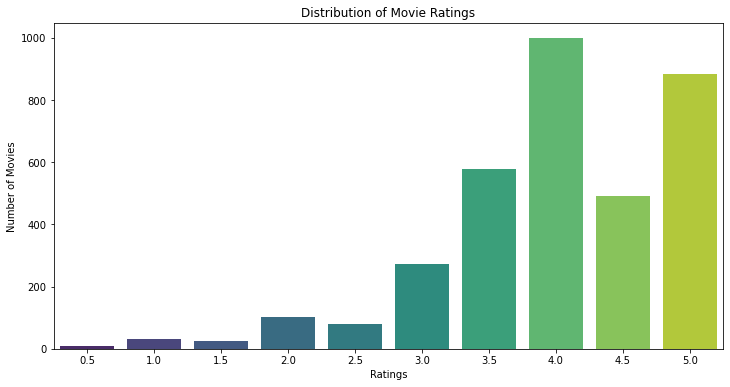

In [245]:

def plot_rating_distribution(data):
   
    # Count the number of movies for each rating
    rating_counts = data['Rating'].value_counts().sort_index()

    # Plotting
    plt.figure(figsize=(12, 6))
    sns.barplot(x=rating_counts.index, y=rating_counts.values, palette='viridis')
    plt.title('Distribution of Movie Ratings')
    plt.xlabel('Ratings')
    plt.ylabel('Number of Movies')
    plt.xticks(rotation=0)
    plt.show()

# Example usage:
plot_rating_distribution(Movies_df)  # Display the rating distribution plot


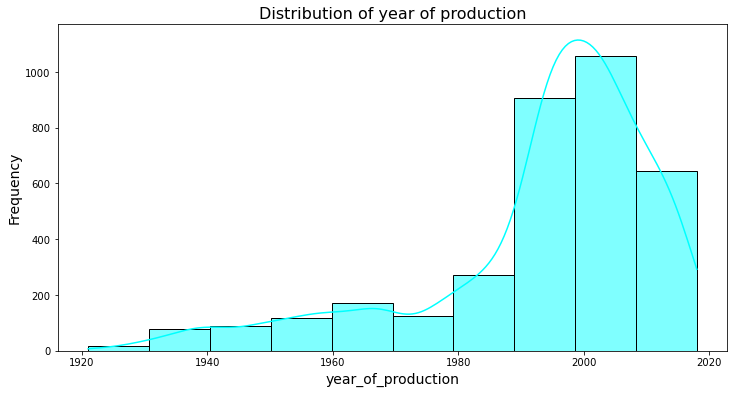

In [246]:
# Create a histogram for the Rating feature
plt.figure(figsize=(12, 6))
sns.histplot(Movies_df['year_of_production'], bins=10, kde=True, color='cyan')

# Add labels and title
plt.title('Distribution of year of production', fontsize=16)
plt.xlabel('year_of_production', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Show the plot
plt.show()

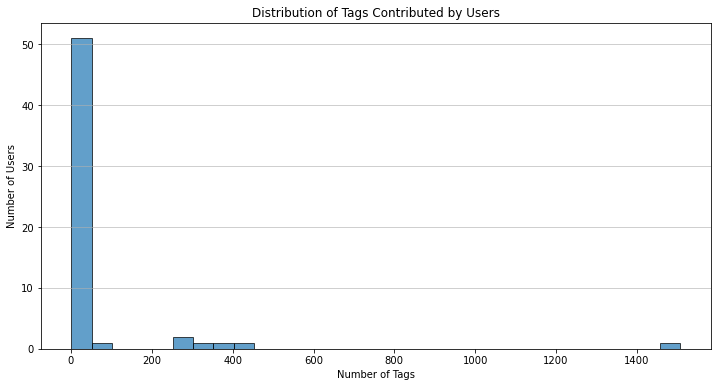

In [247]:
# Count tags contributed by each user
tags_per_user = tags['userId'].value_counts()

# Create a histogram for tags per user
plt.figure(figsize=(12, 6))
plt.hist(tags_per_user, bins=30, edgecolor='black', alpha=0.7)
plt.title('Distribution of Tags Contributed by Users')
plt.xlabel('Number of Tags')
plt.ylabel('Number of Users')
plt.grid(axis='y', alpha=0.75)
plt.show()

* The gragh shows that the genres "Drama" and "Comedy" are the most popular among the movies in the dataset, with significantly higher counts compared to other genres.

* Genres like "Action," "Thriller," and "Crime" have moderate levels of popularity, with counts falling somewhere between the most and least popular categories.
* Genres such as "Western," "Horror," "Musical," "Film-Noir," "IMAX," and "Documentary" have relatively low counts, indicating they are less frequently represented in the dataset.
* There is a category labeled "(no genres listed)" with a non-zero count, suggesting that some movies in the dataset might not have any associated genre information.

# 5.0 DATA PREPROCESSING

## 5.1 Creating a User-Item Matrix

In [202]:
#step 1: creating a user-item matrix
user_item_matrix = Movies_df.pivot_table(index='Userid', columns='Title', values='Rating')

user_item_matrix.head()

Title,(500) Days of Summer (2009),...And Justice for All (1979),10 Cloverfield Lane (2016),10 Things I Hate About You (1999),101 Dalmatians (1996),101 Dalmatians (One Hundred and One Dalmatians) (1961),"11'09""01 - September 11 (2002)",12 Angry Men (1957),13 Going on 30 (2004),2001: A Space Odyssey (1968),...,Young Frankenstein (1974),Z (1969),Zack and Miri Make a Porno (2008),Zelary (2003),Zelig (1983),Zero Dark Thirty (2012),Zombieland (2009),Zoolander (2001),Zulu (1964),eXistenZ (1999)
Userid,,,,,,,,,,,,,,,,,,,,,
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 5.2 Handling Missing Values

Since not every user will have rated every movie, the matrix will have many missing values. SVD can handle missing values implicitly by working only on the observed ratings, but for the our matrix, we want to fill in missing values with zeros

In [203]:
#Filling the missing values with 0
user_item_matrix = user_item_matrix.fillna(0)
user_item_matrix.sample(n=5)

Title,(500) Days of Summer (2009),...And Justice for All (1979),10 Cloverfield Lane (2016),10 Things I Hate About You (1999),101 Dalmatians (1996),101 Dalmatians (One Hundred and One Dalmatians) (1961),"11'09""01 - September 11 (2002)",12 Angry Men (1957),13 Going on 30 (2004),2001: A Space Odyssey (1968),...,Young Frankenstein (1974),Z (1969),Zack and Miri Make a Porno (2008),Zelary (2003),Zelig (1983),Zero Dark Thirty (2012),Zombieland (2009),Zoolander (2001),Zulu (1964),eXistenZ (1999)
Userid,,,,,,,,,,,,,,,,,,,,,
18,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
439,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
291,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
573,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## 5.3 Normalizing The Data

For better performance of SVD, we will proceed and  normalize or mean-center the ratings by subtracting the user or movie average

In [204]:
user_ratings_mean = user_item_matrix.mean(axis=1)
user_item_matrix_normalized = user_item_matrix.sub(user_ratings_mean, axis=0)
user_item_matrix_normalized .head(3)

Title,(500) Days of Summer (2009),...And Justice for All (1979),10 Cloverfield Lane (2016),10 Things I Hate About You (1999),101 Dalmatians (1996),101 Dalmatians (One Hundred and One Dalmatians) (1961),"11'09""01 - September 11 (2002)",12 Angry Men (1957),13 Going on 30 (2004),2001: A Space Odyssey (1968),...,Young Frankenstein (1974),Z (1969),Zack and Miri Make a Porno (2008),Zelary (2003),Zelig (1983),Zero Dark Thirty (2012),Zombieland (2009),Zoolander (2001),Zulu (1964),eXistenZ (1999)
Userid,,,,,,,,,,,,,,,,,,,,,
2,-0.010253,-0.010253,-0.010253,-0.010253,-0.010253,-0.010253,-0.010253,-0.010253,-0.010253,-0.010253,...,-0.010253,-0.010253,-0.010253,-0.010253,-0.010253,-0.010253,-0.010253,-0.010253,-0.010253,-0.010253
7,-0.000684,-0.000684,-0.000684,-0.000684,-0.000684,-0.000684,-0.000684,-0.000684,-0.000684,-0.000684,...,-0.000684,-0.000684,-0.000684,-0.000684,-0.000684,-0.000684,-0.000684,-0.000684,-0.000684,-0.000684
18,-0.020164,-0.020164,-0.020164,-0.020164,-0.020164,-0.020164,-0.020164,-0.020164,-0.020164,-0.020164,...,-0.020164,-0.020164,-0.020164,-0.020164,-0.020164,-0.020164,-0.020164,-0.020164,-0.020164,-0.020164


## 5.4 Performing Singular Value Decomposition

Now that we have a clean user-item matrix, we will apply SVD.

First, we will install scikit-surprise

In [205]:
# Installation of the suprise library:
%pip install scikit-surprise==1.1.1
print("Surprise library installed.")

Note: you may need to restart the kernel to use updated packages.
Surprise library installed.


# 6.0 MODELLING

In this section, we will build a baseline recommendation model using the Surprise library, specifically applying Singular Value Decomposition (SVD) (Singular Value Decomposition) for collaborative filtering. Our goal is to create a robust model that predicts user ratings for movies based on historical data.

To evaluate the model's performance, we will utilize RMSE (Root Mean Squared Error) as our primary metric. Additionally, we will ensure that our predictions are rounded to the nearest 0.5-star increment to align with the rating scale used in the dataset.

## 6.1 Creating a Baseline Model using SVD

In [206]:
# Importing neccesary libraries
from surprise import Dataset, Reader, SVD
from surprise.model_selection import train_test_split

# Loading data into Surprise format
reader = Reader(rating_scale=(0.5, 5))
data = Dataset.load_from_df(Movies_df[['Userid', 'Title', 'Rating']], reader)


# Splitting data into train and test set
trainset, testset = train_test_split(data, test_size=0.2, random_state=42)


# Initializing and train SVD model
svd = SVD()
svd.fit(trainset)

# Predict ratings for testset
predictions = svd.test(testset)

# Function to round to nearest 0.5
def round_to_half(x):
    return round(x * 2) / 2

# Apply rounding to predictions
for pred in predictions:
    rounded_rating = round_to_half(pred.est)  

## 6.2 Evaluating the Baseline Model

In [249]:
# Importing library
from surprise import accuracy

# Calculating accuracy
accuracy.rmse(predictions)

RMSE: 0.5305


0.5304619796969677

An RMSE of 0.582 suggests that, on average, our predicted ratings are relatively close to the actual ratings. While this isn't the optimal result, we'll move forward with hyperparameter tuning to improve the model's accuracy.

## 6.3 Model Tunning

For our model tunning, we will use the GridsearchCV to improve the perfomance of our model.

In [252]:
from surprise.model_selection import GridSearchCV
# Define Hyperparameter Grid
param_grid = {
    'n_factors': [50, 100, 150],
    'n_epochs': [20, 30, 40],
    'lr_all': [0.005, 0.01, 0.02]
}
# Perform GridSearchCV
gs = GridSearchCV(SVD, param_grid, measures=['rmse'], cv=5)
gs.fit(data)

# Output the best score and parameters
print(gs.best_score['rmse'])
print(gs.best_params['rmse'])

0.5057456457411954
{'n_factors': 100, 'n_epochs': 40, 'lr_all': 0.02}


The best RMSE score after tuning is 0.5084, which is an improvement from the previous RMSE of 0.5828. This indicates that the model now predicts user ratings with even higher accuracy after fine-tuning the hyperparameters.

## 7.Collaborative Filtering

Now that we have tunned our SVD model using GridSearchCV and obtained the best hyperparameters, the next step is to provide top 5 movie recommendations to a user, based on their ratings of other movies.
This will be achieved by the use of user_based filtration

####  - User_Based Filtering

In [276]:
def round_to_nearest_half(value):
    """Round a float to the nearest 0.5."""
    return round(value * 2) / 2

def get_top_n_recommendations(user_id, model, data, n=5):
    """Get the top N movie recommendations for a specific user."""
    # Get the list of all unique movie titles
    all_movie_titles = Movies_df['Title'].unique()
    
    # Getting the list of movies the user has already rated
    user_rated_movies = Movies_df[Movies_df['Userid'] == user_id]['Title'].values
    
    # Finding the movies that the user hasn't rated yet
    unrated_movies = [movie for movie in all_movie_titles if movie not in user_rated_movies]
    
    # Predicting ratings for the unrated movies
    predictions = [model.predict(user_id, movie) for movie in unrated_movies]
    
    # Sorting the predicted ratings in descending order
    top_n_predictions = sorted(predictions, key=lambda x: x.est, reverse=True)[:n]
    
    # Return the top N movie titles and their predicted ratings rounded to nearest 0.5
    return [(pred.iid, round_to_nearest_half(pred.est)) for pred in top_n_predictions]

# Ask the user to input their user ID
user_id = input("Please enter your User ID: ")

# Predicting the top 5 movies for the specified user
top_5_recommendations = get_top_n_recommendations(int(user_id), svd, Movies_df, n=5)

# Output the recommendations
print(f"\033[4mTop 5 movie recommendations for User {user_id}:\033[0m\n")
for movie, rating in top_5_recommendations:
    print(f"{movie}: Predicted Rating: {rating:.1f}\n")


Top 5 movie recommendations for User 200:

Talented Mr. Ripley, The (1999): Predicted Rating: 4.5

Eraserhead (1977): Predicted Rating: 4.5

Lord of the Rings: The Return of the King, The (2003): Predicted Rating: 4.5

Star Wars: Episode V - The Empire Strikes Back (1980): Predicted Rating: 4.5

Mary and Max (2009): Predicted Rating: 4.5



Using the user based filtration, We have implemented an input field that allows the entry of User ID, which generates the top 5 movie recommendations based on their ratings.

####  - Content_Based Fitering

Content-based filtering is a recommendation technique that suggests items to users based on the features or attributes of the items themselves, rather than relying on user interactions with items (like ratings). It uses item metadata, such as descriptions, genres, keywords, or other characteristics, to make recommendations

We will leverage the **scikit-learn** `TfidfVectorizer` function which converts text to feature vectors that is fed into an estimator.

In [296]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Combine genres and tags as a single feature string for each movie
Movies_df['combined_features'] = Movies_df['Genres'] + ' ' + Movies_df['Tag']

# Use TF-IDF Vectorizer to convert combined features into a matrix
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(Movies_df['combined_features'])

In [278]:
from sklearn.metrics.pairwise import cosine_similarity

# Compute the cosine similarity matrix
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)


In [285]:
def get_recommendations(movie_title, cosine_sim=cosine_sim):
    """Get recommendations based on a given movie title."""
    # Check if the movie title exists in the DataFrame
    if movie_title not in Movies_df['Title'].values:
        return f"Sorry, '{movie_title}' not found in the database. Please try another movie."

    # Get the index of the movie that matches the title
    idx = Movies_df[Movies_df['Title'] == movie_title].index[0]

    # Get the pairwise similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the indices of the most similar movies, excluding the first one (which is the same movie)
    movie_indices = [i[0] for i in sim_scores[1:6]]  # Exclude the first one

    # Return the top 5 most similar movies
    return Movies_df['Title'].iloc[movie_indices].unique()  # Ensure uniqueness

# Allow user input for movie title
movie_title_input = input("Please enter a movie title: ")

# Get recommendations
recommendations = get_recommendations(movie_title_input)

# Output the recommendations

print(f"\033[4mYou might also like:\033[0m\n")
if isinstance(recommendations, str):
    print(recommendations)  # Print error message
else:
    for movie in recommendations:
        print(movie)


You might also like:

Two Days, One Night (Deux jours, une nuit) (2014)
La La Land (2016)
Punch-Drunk Love (2002)
Up (2009)
In the Mood For Love (Fa yeung nin wa) (2000)


## 6.8 Cold Start Mitigation for New User

Cold start mitigation for new users is a critical challenge in recommendation systems, particularly in collaborative filtering methods, where the system relies heavily on user interactions and preferences to make suggestions: Here we will employ two stratges to adress this issue. There strategies are:-
- Content based Filtering for new users 
- Movie polularity 

### 1 Content_based filtering for `new users`

Content-based filtering for new users involves recommending movies based on the features of the movie themselves.

Since new users don’t have a history of rated movies, we are going to recommend movies based on their known preferences, in this case movie genre to recommend the best movies thes elected genre.

In [293]:
# Sample user preferences - genres to choose from
available_genres = [
    'Adventure', 'Animation', 'Children', 'Comedy', 'Fantasy',
    'Romance', 'Mystery', 'Thriller', 'Crime', 'Action',
    'Drama', 'War', 'Sci-Fi', 'Western', 'Horror',
    'Musical', 'Film-Noir', 'IMAX', 'Documentary'
]

# Ask the user to input their preferred genre
print("Available genres:")
for genre in available_genres:
    print(f"- {genre}")

user_genre = input("Please enter your preferred genre: ")

# Check if the input genre is valid
if user_genre in available_genres:
    # Filter the Movies_df based on the user-selected genre
    recommended_movies = Movies_df[Movies_df['Genres'].str.contains(user_genre)]
    
    # Sort the recommended movies by ratings in descending order
    recommended_movies_sorted = recommended_movies.sort_values(by='Rating', ascending=False)

    # Remove duplicates by keeping the first occurrence of each unique title
    recommended_movies_unique = recommended_movies_sorted.drop_duplicates(subset=['Title'])

    # Display the top 5 recommended unique movies
    print(f"\nTop movies in the '{user_genre}' genre:")
    print(recommended_movies_unique[['Title']].head(5))
      # print(recommended_movies_unique[['Title', 'Genres', 'Rating']].head(5))
else:
    print("Sorry, the genre you entered is not available. Please try again.")


Available genres:
- Adventure
- Animation
- Children
- Comedy
- Fantasy
- Romance
- Mystery
- Thriller
- Crime
- Action
- Drama
- War
- Sci-Fi
- Western
- Horror
- Musical
- Film-Noir
- IMAX
- Documentary

Top movies in the 'Crime' genre:
                                Title
8          Usual Suspects, The (1995)
505                 Fight Club (1999)
632                  Inception (2010)
584           Dark Knight, The (2008)
567  Shawshank Redemption, The (1994)


#### - Movie Popularity `new users`

Another approach to tackle the cold start problem for new users is to recommend the highest-rated movies regardless of genre. 

Since new users lack interaction history, suggesting highly-rated or popular films guarantees that they receive quality recommendations immediately, thereby enhancing user acquisition and retention

In [294]:
# movie ratings and their average rating
popular_movies = Movies_df.groupby('Title').agg({'Rating': 'mean'}).reset_index()
popular_movies = popular_movies.sort_values(by='Rating', ascending=False)

# Get the top 5 popular movies
top_n_popular = popular_movies.head(5)

# Display the popular movies
print(top_n_popular)


                                 Title  Rating
0          (500) Days of Summer (2009)     5.0
1188        Sound of Music, The (1965)     5.0
279           Crossing Delancey (1988)     5.0
1151             Shutter Island (2010)     5.0
1140  Shawshank Redemption, The (1994)     5.0



By implementing the hybrid model, we successfully addressed the cold start problem for new users by recommending popular movies and leveraging content-based filtering to provide personalized suggestions based on their preferences.

## 7.0 CONCLUSIONS

### 1.Personalized Top 5 Movie Recommendations.
The implementation of collaborative filtering  using the user based filtration techniques successfully provides personalized recommend, enhancing user engagement and satisfaction. Users receive tailored movie suggestions based on their ratings, leading to increased interaction with the platform.

### 2. Content based filteration for exixsting users .
employment of the content-based filtering system for existing users, allows them to enter a specific movie title. Upon entering the title, the system suggests similar movies based on the selected movie's attributes, enhancing the user's experience by providing relevant recommendations tailored to their interests.

### 3. Cold Start Problem Mitigation
- Movie Popularity:
For new users who lack interaction history, the system recommends the highest-rated regardless of genre. This approach ensures that users are introduced to quality content right from their first interaction, enhancing user acquisition and retention. 

- Content-Based Genre Recommendations:
 In addition to popularity-based recommendations, we have integrated a content-based filtering mechanism that allows new users to select their preferred movie genre. Once a genre is selected, the system suggests the highest-rated movies within that category. This method not only personalizes the recommendations based on user interests but also facilitates a more targeted exploration of films that align with their tastes.

 ### 4. Evaluation of the model.
To assess the performance of our recommendation system, we employed the Root Mean Square Error (RMSE).
After implementing improvements to the model through hyperparameter tuning with GridSearchCV, we achieved an RMSE of 0.50. This indicates that, on average, our model's predictions are within 0.50 rating points of the actual user ratings.

### 5. Movie Rating Frequency
The analysis reveals that, on average, movies from the MovieLens dataset received a rating of 4.0 on a scale ranging from 0.5 to 5.0

## 8.0 RECOMENDATION

- The film industry is dynamic, with new releases reflecting changing audience preferences, cultural trends, and technological advancements. By including the latest movies, the dataset remains relevant and up-to-date, ensuring users have access to current content that aligns with contemporary tastes.

- Enrich the existing movie data with comprehensive information about the filmmakers. Specifically, including details about the authors (screenwriters) and producers of each film can greatly enhance the dataset's value for users and improve the recommendation system's effectiveness.By analyzing the works of specific authors and producers, the recommendation system can suggest similar films created by the same talent.

- By broadening genre classifications to include niche and diverse categories, MovieLens can create a more inclusive and engaging platform that appeals to a wider range of viewers. This strategy not only enhances user satisfaction but also promotes exploration and discovery, ultimately enriching the overall cinematic experience for all users